# Simple Neural Network with PyTorch Lightning

This notebook is used to implement a simple neural network using PyTorch Lightning. PyTorch Lightning provides an easy way to perform operations like learning rate optimization and allowing code to be run on GPU/TPU easily.

This notebook is based on a tutorial from [StatQuest](https://www.youtube.com/watch?v=khMzi6xPbuM&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=26).

## 1. Library Set Up

Install and import the necessary libraries.

In [ ]:
#!pip install torch 
#!pip install matplotlib 
#!pip install seaborn 
#!pip install lightning

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD 

import lightning as L
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Create a Simple Neural Network with PyTorch Lightning

Initialize the weights and biases of the neural network based on the sample neural network in the figure below.

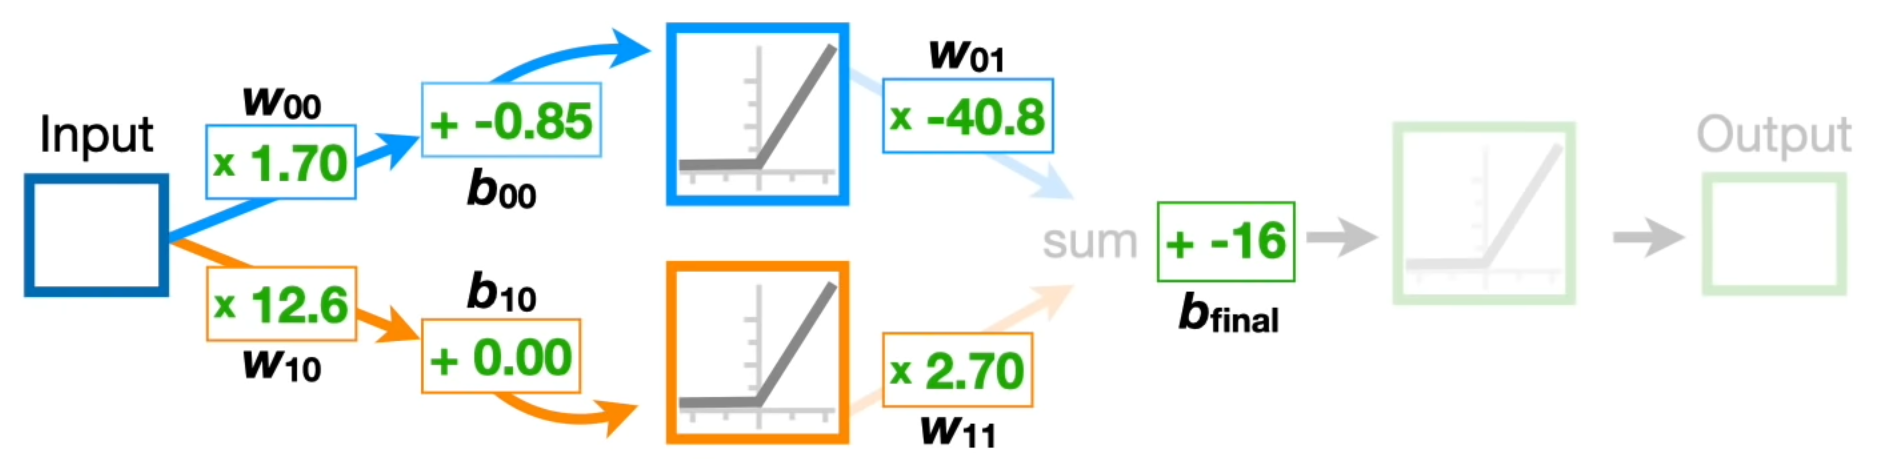
*Image from StatQuest YouTube Channel*

In [2]:
class BasicLightning(L.LightningModule): # initialize a NN class inheriting from the L.LightningModule class
    def __init__(self):
        super().__init__() # initialize the parent class

        # initialize the weights and biases as parameters so that they can be optimized if we want
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False) # requires_grad set to false as we don't want to optimize this parameter
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)

    # define the forward pass of the network
    def forward(self, input): 
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

## 3. Test the Neural Network

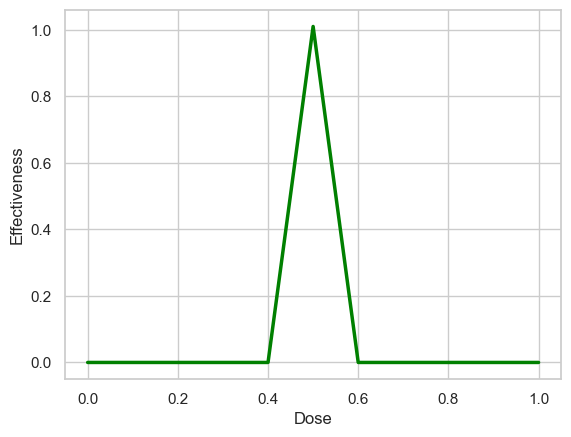

In [3]:
# Create test dataset
input_doses = torch.linspace(start=0, end=1, steps=11) # create a tensor of 11 equally spaced values between 0 and 1

# Create the model
model = BasicLightning()

# Run prediction
output = model(input_doses)

# Plot the output
sns.set(style="whitegrid")
sns.lineplot(x=input_doses, y=output, color="green", linewidth=2.5)
plt.ylabel("Effectiveness")
plt.xlabel("Dose");

## 4. Optimize the Neural Network Using Backpropagation and PyTorch Lightning

Set the final_bias value to 0 and use backpropagation and Lightning to optimize the weights and biases of the neural network.

In [4]:
class BasicLightningTrain(L.LightningModule): # initialize a NN class inheriting from the L.LightningModule class
    def __init__(self):
        super().__init__() # initialize the parent class

        # initialize the weights and biases as parameters so that they can be optimized if we want
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False) # requires_grad set to false as we don't want to optimize this parameter
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True) # set requires_grad to True to optimize this parameter

        self.learning_rate = 0.01 # add a learning rate parameter for Lighning to optimize. 0.01 is a placeholder value 

    # define the forward pass of the network
    def forward(self, input): 
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

Run inference on BasicLightningTrain to verify it no longers provides the correct output.

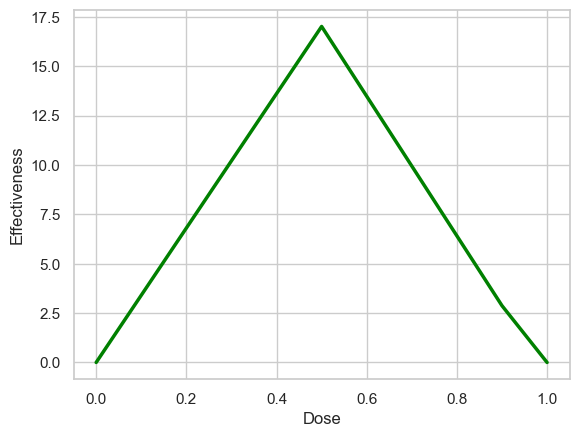

In [5]:
# Create dataset
input_doses = torch.linspace(start=0, end=1, steps=11)  # create a tensor of 11 equally spaced values between 0 and 1

# Create the model
model = BasicLightningTrain()

# Run prediction
output = model(input_doses)

# Plot the output
sns.set(style="whitegrid")
sns.lineplot(x=input_doses, y=output.detach(), color="green", linewidth=2.5) # output is detached to avoid tracking the gradient
plt.ylabel("Effectiveness")
plt.xlabel("Dose");

Create training data and run the training loop to optimize the weights and biases of the neural network.

In [6]:
# Create training data
inputs = torch.tensor([0, 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

# Store data in a TensorDataset and DataLoader
dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset) # dataloaders make it easy to access the data in batches and shuffle them for each epoch

Update the BasicLightningTrain class to include the optimizer confige and training loop.

In [7]:
class BasicLightningTrain(L.LightningModule): # initialize a NN class inheriting from the L.LightningModule class
    def __init__(self):
        super().__init__() # initialize the parent class

        # initialize the weights and biases as parameters so that they can be optimized if we want
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False) # requires_grad set to false as we don't want to optimize this parameter
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True) # set requires_grad to True to optimize this parameter

        self.learning_rate = 0.01 # add a learning rate parameter for Lighning to optimize. 0.01 is a placeholder value 

    # define the forward pass of the network
    def forward(self, input): 
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

    # set up method to optimize the model
    def configure_optimizers(self):
        return SGD(self.parameters(), lr=self.learning_rate)

    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = (output_i - label_i) ** 2

        return loss

Train the model

In [15]:
model = BasicLightningTrain()
trainer = L.Trainer(max_epochs=34) # use 34 epochs since we already know 34 is the optimal number of epochs to train the model without Lightning

# lr_find() will create 100 candidate learning rates between min_lr and max-lr, and test them all since early_stop_threshold is None
lr_find_resullts = trainer.tuner.lr_find(model,
                                         train_dataloaders=dataloader,
                                         min_lr=0.001,
                                         max_lr=1.0,
                                         early_stop_threshold=None)

new_lr = lr_find_resullts.suggestion()

print(f"lr_find() suggests {new_lr:.5f} for the learning rate.")

model.learning_rate = new_lr

trainer.fit(model, train_dataloaders=dataloader) # .fit calls the configure_optimizers() function and training_step() function

print(model.final_bias.data)

NameError: name 'lr_find' is not defined